**1. Dataset Loading**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
true_df = pd.read_csv("D:/IIT Madras/SEM 2/ML OPS LAB/End-to-End-MLOPS-Project/dataset/True.csv")
fake_df = pd.read_csv("D:/IIT Madras/SEM 2/ML OPS LAB/End-to-End-MLOPS-Project/dataset/Fake.csv")

# Add labels
true_df["label"] = 1  # real
fake_df["label"] = 0  # fake

# Combine
df = pd.concat([true_df, fake_df], ignore_index=True)


In [13]:
print(df.shape)
print(df.columns)
print(df.info())
print(df.isnull().sum())

(44898, 5)
Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None
title      0
text       0
subject    0
date       0
label      0
dtype: int64


**2. EDA**

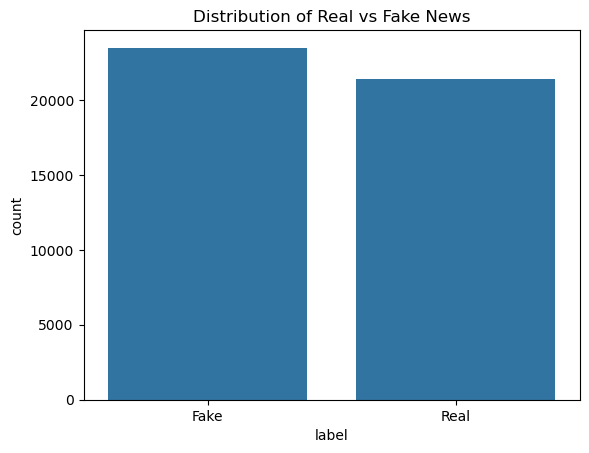

In [14]:
sns.countplot(x="label", data=df)
plt.title("Distribution of Real vs Fake News")
plt.xticks([0,1], ['Fake', 'Real'])
plt.show()


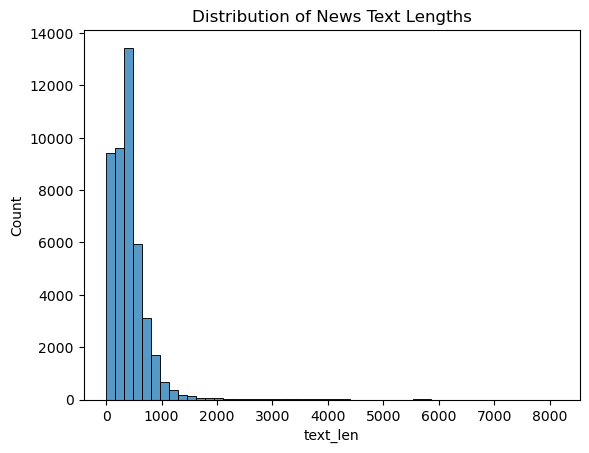

In [15]:
df['text_len'] = df['text'].apply(lambda x: len(str(x).split()))
sns.histplot(df['text_len'], bins=50)
plt.title("Distribution of News Text Lengths")
plt.show()


In [29]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def get_top_n_words(corpus, n=20):
    words = " ".join(corpus).lower().split()
    filtered_words = [w for w in words if w not in stop_words and w.isalpha()]
    return Counter(filtered_words).most_common(n)

print("Real News:", get_top_n_words(df[df['label'] == 1]['text']))
print("Fake News:", get_top_n_words(df[df['label'] == 0]['text']))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Real News: [('said', 72035), ('trump', 36485), ('would', 31361), ('president', 23399), ('new', 16578), ('also', 15870), ('state', 15608), ('united', 15521), ('government', 15319), ('house', 14550), ('republican', 14500), ('told', 14221), ('could', 13597), ('last', 12529), ('people', 12400), ('states', 11819), ('one', 11792), ('two', 11279), ('washington', 10785), ('former', 10585)]
Fake News: [('trump', 65511), ('would', 23261), ('people', 22359), ('president', 22080), ('one', 21561), ('said', 21221), ('like', 16858), ('donald', 16800), ('obama', 16043), ('clinton', 15614), ('also', 14771), ('new', 13941), ('even', 13515), ('hillary', 12584), ('white', 12235), ('news', 12123), ('us', 11811), ('state', 10833), ('get', 10603), ('could', 10084)]


In [25]:
data=df.drop(['title','subject','date','text_len'], axis = 1)

In [26]:
data.isnull().sum() 

text     0
label    0
dtype: int64

In [27]:
data.head(5)

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


**3. Modeling**

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X = tfidf.fit_transform(data['text'])
y = data['label']


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression**

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4650
           1       0.98      0.99      0.98      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



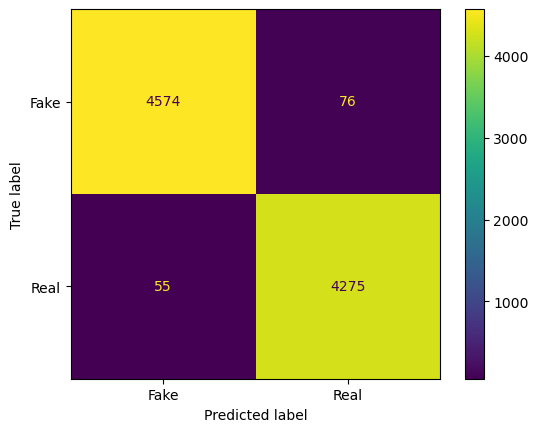

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred1)  # use model1, 2, or 3
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Fake", "Real"])
disp.plot()


In [36]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

print(classification_report(y_test, y_pred2))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4650
           1       0.99      0.99      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



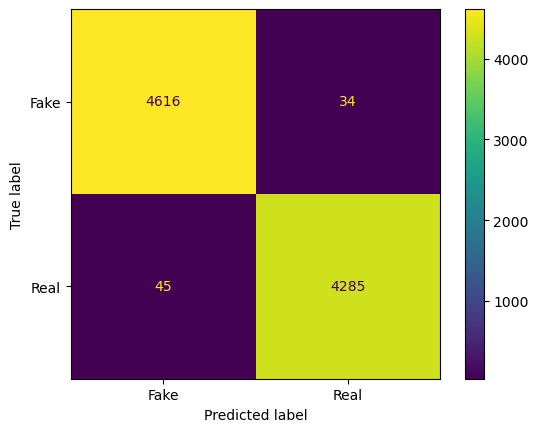

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred2)  # use model1, 2, or 3
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Fake", "Real"])
disp.plot()


In [37]:
from sklearn.naive_bayes import MultinomialNB

model3 = MultinomialNB()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

print(classification_report(y_test, y_pred3))


              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4650
           1       0.93      0.93      0.93      4330

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



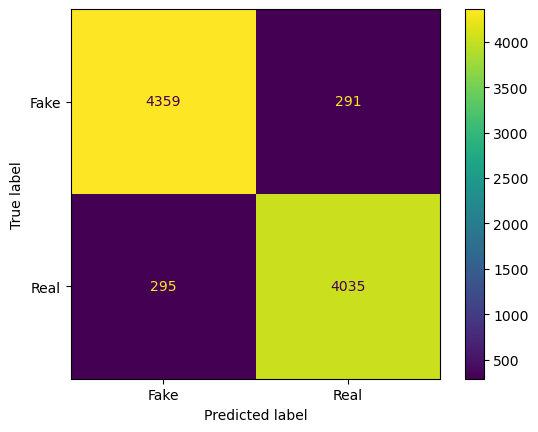

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred3)  # use model1, 2, or 3
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Fake", "Real"])
disp.plot()


**4. Saving Models**

In [45]:
import joblib

# Save Logistic Regression
joblib.dump(model1, "D:/IIT Madras/SEM 2/ML OPS LAB/End-to-End-MLOPS-Project/models/logistic_regression.pkl")

# Save Random Forest
joblib.dump(model2, "D:/IIT Madras/SEM 2/ML OPS LAB/End-to-End-MLOPS-Project/models/random_forest.pkl")

# Save Multinomial Naive Bayes
joblib.dump(model3, "D:/IIT Madras/SEM 2/ML OPS LAB/End-to-End-MLOPS-Project/models/naive_bayes.pkl")

joblib.dump(tfidf, "D:/IIT Madras/SEM 2/ML OPS LAB/End-to-End-MLOPS-Project/models/tfidf_vectorizer.pkl")


['D:/IIT Madras/SEM 2/ML OPS LAB/End-to-End-MLOPS-Project/models/tfidf_vectorizer.pkl']